In [2]:
import numpy as np
import pandas as pd
import sklearn
import mglearn
from sklearnex  import  patch_sklearn 
patch_sklearn ()


dataset = pd.read_csv('dataset_limpio.csv')
dataset = dataset.drop(['Unnamed: 0'], axis=1)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from sklearnex  import  patch_sklearn 
patch_sklearn ()
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt






def plot_figure(data, labels):
    


    plt.figure(figsize=(8, 5))
    plt.scatter(data[:,0], data[:,1], c=labels, linewidths= 0.001, edgecolors='k')

def bench_marks(name, data, labels, fit_time):
    

    
    
    results = [name, fit_time]
    results += [silhouette_score(data, labels, metric = 'euclidean')]
    results += [davies_bouldin_score(data,labels)]
    results += [calinski_harabasz_score(data, labels)]
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    results += [n_clusters_]
    
    formatter_result = (
        "{:6s}\t\t{:.3f}s\t{:.3f}\t\t{:.3f}\t\t{:.2f}\t\t{:.0f}"
    )
    print(formatter_result.format(*results))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


__________________________________________________________________________________
name			time		silhouette	davies_bouldin	calinski_harabasz	n_clusters

db    		5.604s	0.937		1.278		4304.39		28
__________________________________________________________________________________


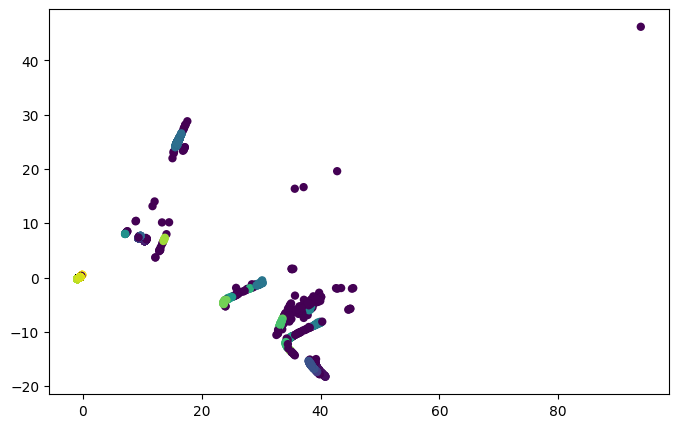

In [6]:
from sklearn.cluster import DBSCAN

from sklearnex  import  patch_sklearn 
patch_sklearn ()


print(82 * "_")
print("name\t\t\ttime\t\tsilhouette\tdavies_bouldin\tcalinski_harabasz\tn_clusters\n")


Y = dataset[:int(len(dataset)*0.1)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Y)
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X_scaled)

db = DBSCAN()

t0 = time()
estimator = db.fit(X_pca)
labels= estimator.labels_
fit_time = time() - t0

bench_marks(name = "db", data = X_pca, labels = labels, fit_time = fit_time)
plot_figure(X_pca, labels)



print(82 * "_")